In [2]:
import chardet
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

with open('D:/大数据分析实践 实验内容/Pokemon.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('D:/大数据分析实践 实验内容/Pokemon.csv', encoding=result['encoding'])
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [3]:
df=df.iloc[:-4]
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE


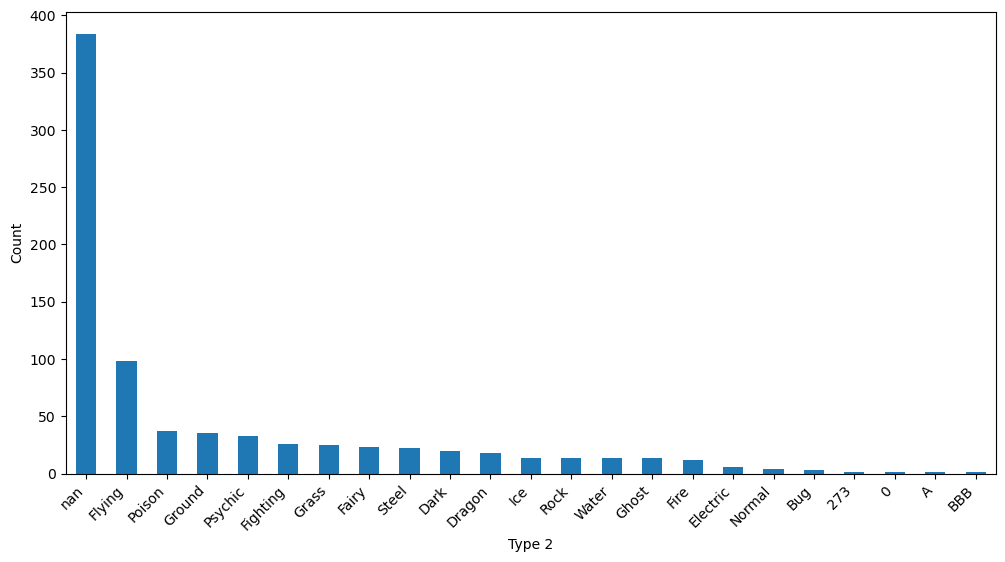

In [4]:
type2_counts = df['Type 2'].value_counts(dropna=False)

plt.figure(figsize=(12, 6))
type2_counts.plot(kind='bar')

plt.xlabel('Type 2')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()

In [5]:
target_contents = ['273', '0', 'A', 'BBB']
df[df['Type 2'].isin(target_contents)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
34,27,Sandshrew,Ground,0,300,50,75,85,20,30,40,1,FALSE
39,32,Nidoranâ™?Poison,NaN,273,46,57,40,40,40,50,1,FALSE,NaN
117,107,Hitmonchan,Fighting,A,455,50,105,79,35,110,76,1,FALSE
428,382,KyogrePrimal Kyogre,Water,BBB,770,100,150,90,180,160,90,3,TRUE


In [6]:
df = df[~df['Type 2'].isin(target_contents)]
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE


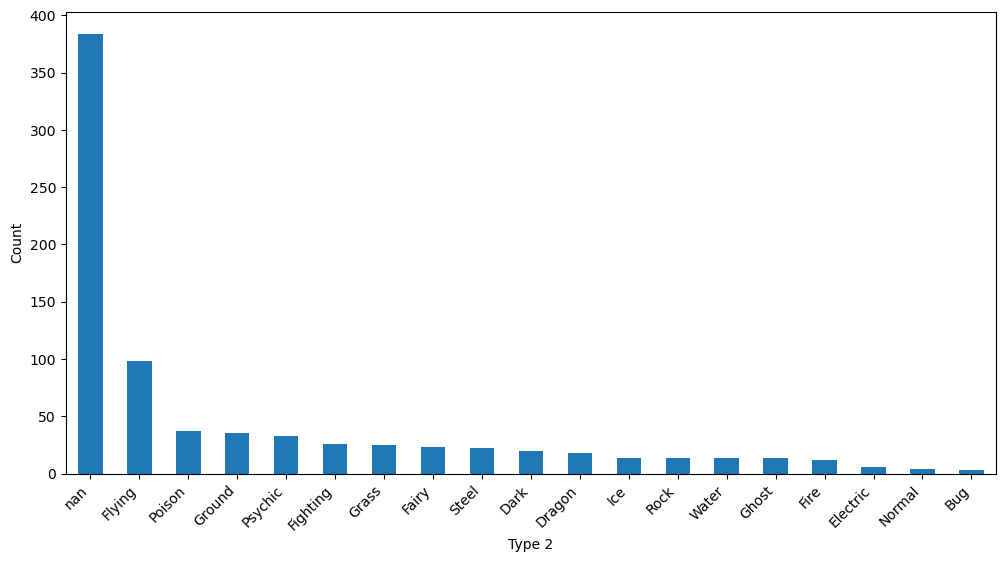

In [7]:
type2_counts_cleaned = df['Type 2'].value_counts(dropna=False)

plt.figure(figsize=(12, 6))
type2_counts_cleaned.plot(kind='bar')

plt.xlabel('Type 2')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()

In [8]:
df[df.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,FALSE
23,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,FALSE
185,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
186,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
187,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE


In [9]:
df = df.drop_duplicates()
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE


C:\Users\29493\AppData\Local\Temp\ipykernel_22168\4056873857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack'] = pd.to_numeric(df.iloc[:, 6], errors='coerce')


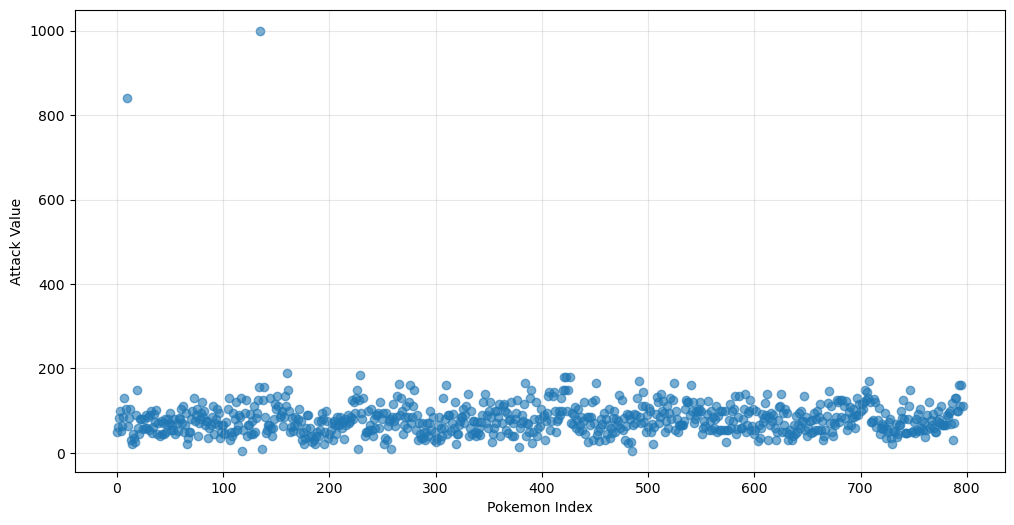

In [10]:
df['Attack'] = pd.to_numeric(df.iloc[:, 6], errors='coerce')

x = np.arange(df.shape[0])
y = df['Attack']

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Pokemon Index")
plt.ylabel("Attack Value")
plt.grid(alpha=0.3)
plt.show()

In [11]:
Q1 = df['Attack'].quantile(0.25)
Q3 = df['Attack'].quantile(0.75)
IQR = Q3 - Q1

upper_threshold = Q3 + 1.5 * IQR
outliers = df[df['Attack'] > upper_threshold]

outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,314,44,840.0,65,50,64,43,1,FALSE
140,128,Tauros,Normal,NaN,490,75,1000.0,95,40,70,110,1,FALSE
165,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190.0,100,154,100,130,1,TRUE
237,214,HeracrossMega Heracross,Bug,Fighting,600,80,185.0,115,40,105,75,2,FALSE
430,383,GroudonPrimal Groudon,Ground,Fire,770,100,180.0,160,150,90,90,3,TRUE
432,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180.0,100,180,100,115,3,TRUE
435,386,DeoxysAttack Forme,Psychic,NaN,600,50,180.0,20,180,20,150,3,TRUE
500,445,GarchompMega Garchomp,Dragon,Ground,700,108,170.0,115,120,95,92,4,FALSE
717,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170.0,100,120,90,95,5,TRUE


In [12]:
df = df[~df['Attack'].isin(outliers['Attack'])]
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49.0,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62.0,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82.0,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100.0,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52.0,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,719,Diancie,Rock,Fairy,600,50,100.0,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160.0,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110.0,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160.0,60,170,130,80,6,TRUE


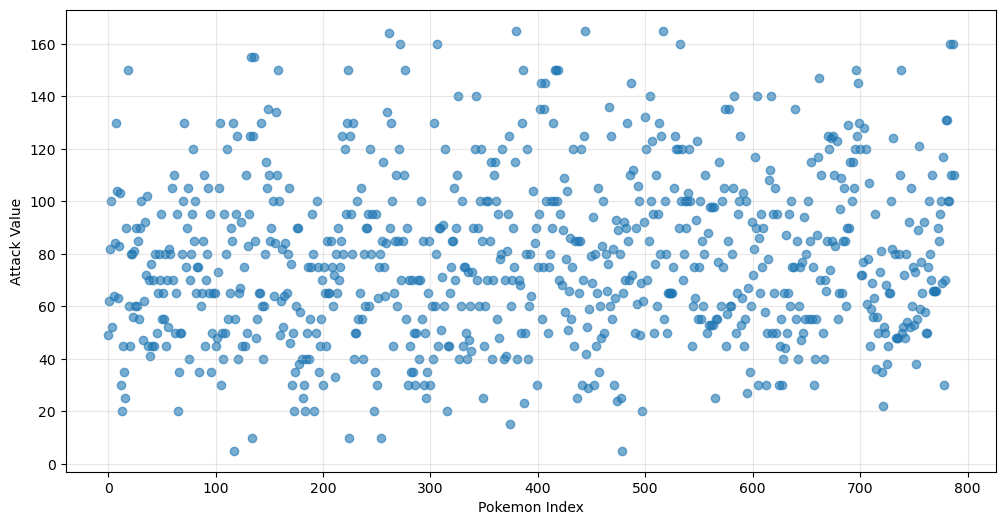

In [13]:
x = np.arange(df.shape[0])
y = df['Attack']

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.6)  # alpha=0.6 让点更清晰（避免重叠）
plt.xlabel("Pokemon Index")
plt.ylabel("Attack Value")
plt.grid(alpha=0.3)  # 添加网格线，便于观察
plt.show()

In [27]:
#查看两列的数据
print(df['Generation'].unique())
print(df['Legendary'].unique())

['1' 'FALSE' '2' '3' nan '4' '5' '6' 'undefined']
['FALSE' '1' '0' 'Poison' 'Ground' 'TRUE' nan]


In [29]:
#查询数据类型
df.dtypes

#              object
Name           object
Type 1         object
Type 2         object
Total          object
HP             object
Attack        float64
Defense        object
Sp. Atk        object
Sp. Def        object
Speed          object
Generation     object
Legendary      object
dtype: object

In [31]:
#查看包含目标内容的行
target_contents = ['FALSE','undefined']
df[df['Generation'].isin(target_contents)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
11,9,Blastoise,Water,NaN,530,79,83.0,100,85,105,78,FALSE,1
32,25,Pikachu,Electric,NaN,320,35,55.0,40,50,50,90,FALSE,0
771,695,Heliolisk,Electric,Normal,481,62,55.0,52,109,94,109,undefined,FALSE


In [33]:
#交换11、32行对应列内容
temp_generation_11 = df.loc[11, 'Generation']
temp_generation_32 = df.loc[32, 'Generation']

df.loc[11, 'Generation'] = df.loc[11, 'Legendary']
df.loc[32, 'Generation'] = df.loc[32, 'Legendary']

df.loc[11, 'Legendary'] = temp_generation_11
df.loc[32, 'Legendary'] = temp_generation_32

df.loc[11:11]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
11,9,Blastoise,Water,NaN,530,79,83.0,100,85,105,78,1,FALSE


In [35]:
df.loc[32:32]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
32,25,Pikachu,Electric,NaN,320,35,55.0,40,50,50,90,0,FALSE


In [37]:
# 使用布尔索引删除指定的行
rows_to_delete = [45, 78, 115, 130,771]
df = df[~df.index.isin(rows_to_delete)]

print(df.loc[45:45])
print(df.loc[78:78])
print(df.loc[115:115])
print(df.loc[130:130])
print(df.loc[771:771])

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []


In [39]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49.0,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62.0,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82.0,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100.0,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52.0,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,719,Diancie,Rock,Fairy,600,50,100.0,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160.0,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110.0,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160.0,60,170,130,80,6,TRUE
